## Importación de librerias 

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

## Carga del archivo CSV

In [217]:
# cargar el documento csv con pd.read_csv, creando el dataframe
df = pd.read_csv('/Users/stam/Documents/Documents_MacBook_Eduardo/GitHub/jumping_spider_salticidae/datasets/world_spider_catalog_v25_5.csv')

## Análisis Exploratorio

In [219]:
# datos cargados
# muestra las primeras filas del dataframe
df.head(3)

,speciesId,species_lsid,family,genus,species,subspecies,author,year,parentheses,distribution
0,1,urn:lsid:nmbe.ch:spidersp:000896,Actinopodidae,Actinopus,caraiba,NaN,Simon,1889,1,Venezuela
1,2,urn:lsid:nmbe.ch:spidersp:000898,Actinopodidae,Actinopus,crassipes,NaN,Keyserling,1891,1,"Brazil, Paraguay, Argentina"
2,3,urn:lsid:nmbe.ch:spidersp:000899,Actinopodidae,Actinopus,cucutaensis,NaN,Mello-Leitão,1941,0,"Colombia, Venezuela, Brazil"


In [220]:
# columnas del dataframe
df.columns

Index(['speciesId', 'species_lsid', 'family', 'genus', 'species', 'subspecies',
       'author', 'year', 'parentheses', 'distribution'],
      dtype='object')

In [221]:
# identifica el tipo de datos de cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52598 entries, 0 to 52597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   speciesId     52598 non-null  int64 
 1   species_lsid  52598 non-null  object
 2   family        52598 non-null  object
 3   genus         52598 non-null  object
 4   species       52598 non-null  object
 5   subspecies    441 non-null    object
 6   author        52598 non-null  object
 7   year          52598 non-null  int64 
 8   parentheses   52598 non-null  int64 
 9   distribution  52597 non-null  object
dtypes: int64(3), object(7)
memory usage: 4.0+ MB


In [222]:
# dimensión del dataframe
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

Número de filas: 52598
Número de columnas: 10


## Limpiesa de datos

In [224]:
# se verifica la completitud de las variables (valores nulos existentes)
# se utiliza la función .sum() para sumar los elementos que están vacíos (.isnull())
nulos = df.isnull().sum()

# calculo del porcentaje de completitud
completitud = pd.DataFrame(100 - (nulos / len(df) * 100))

# reset_index se utiliza para resetear los índices
# inplace = True sirve para evitar la repetición
completitud.reset_index(inplace = True)
# se coloan encebezados
completitud = completitud.rename(columns = {"index":"variable",0:"completitud"})

# ordenamos las columnas con menor completitud en adelante
completitud.sort_values(by ='completitud', ascending = True)
completitud

,variable,completitud
0,speciesId,100.000000
1,species_lsid,100.000000
2,family,100.000000
3,genus,100.000000
4,species,100.000000
5,subspecies,0.838435
6,author,100.000000
7,year,100.000000
8,parentheses,100.000000
9,distribution,99.998099


In [225]:
# eliminacion de los datos duplicados
df.drop_duplicates(inplace=True)

# eliminacion de los datos faltantes
df = df.dropna(subset=['distribution'])

In [226]:
# se verifica la completitud de las variables (valores nulos existentes)
# se utiliza la función .sum() para sumar los elementos que están vacíos (.isnull())
nulos = df.isnull().sum()

# calculo del porcentaje de completitud
completitud = pd.DataFrame(100 - (nulos / len(df) * 100))

# reset_index se utiliza para resetear los índices
# inplace = True sirve para evitar la repetición
completitud.reset_index(inplace = True)
# se coloan encebezados
completitud = completitud.rename(columns = {"index":"variable",0:"completitud"})

# ordenamos las columnas con menor completitud en adelante
completitud.sort_values(by ='completitud', ascending = True)
completitud

,variable,completitud
0,speciesId,100.000000
1,species_lsid,100.000000
2,family,100.000000
3,genus,100.000000
4,species,100.000000
5,subspecies,0.838451
6,author,100.000000
7,year,100.000000
8,parentheses,100.000000
9,distribution,100.000000


In [227]:
# dimensión del dataframe con eliminacion de datos duplicados
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

Número de filas: 52597
Número de columnas: 10


## Análisis Exploratorio Posterior a la Limpieza de Datos

In [229]:
#¿Cuáles son las familias más diversas?
# Contar el número de especies por familia
familias_mas_diversas_df = df['family'].value_counts()

# Mostrar las 10 familias más diversas
print("Familias más diversas")
print(familias_mas_diversas_df.head(10))

Familias más diversas
family
Salticidae     6791
Linyphiidae    4870
Araneidae      3134
Theridiidae    2587
Lycosidae      2492
Gnaphosidae    2480
Thomisidae     2173
Pholcidae      2024
Oonopidae      1962
Sparassidae    1508
Name: count, dtype: int64


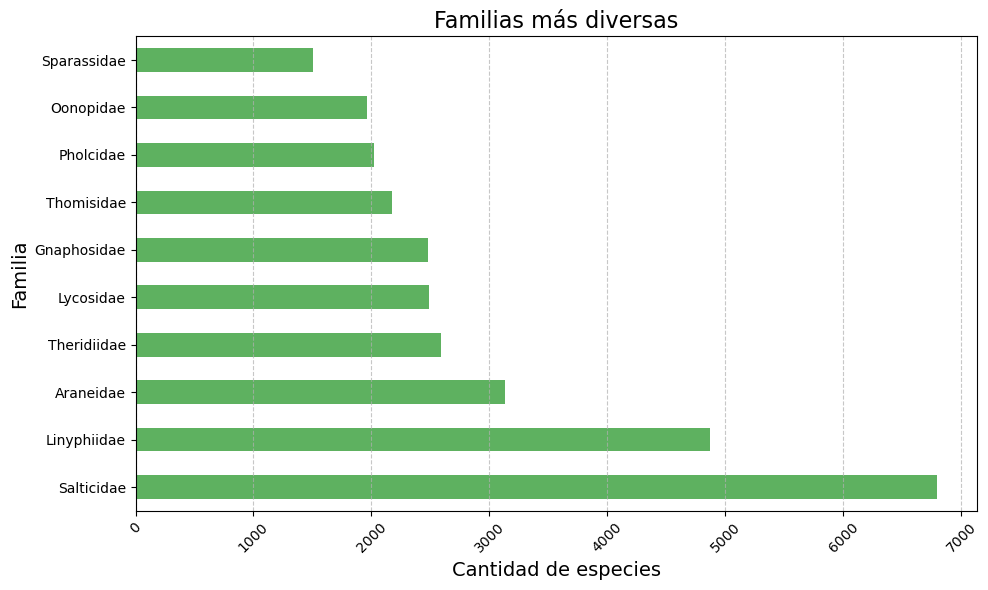

In [230]:
# graficar las familias más diversas en el mundo
familias_mas_diversas_df.head(10).plot(kind='barh', color='#5EB160', figsize=(10, 6))
plt.title('Familias más diversas', fontsize=16)
plt.xlabel('Cantidad de especies', fontsize=14)
plt.ylabel('Familia', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [231]:
#¿Cómo se distribuyen las arañas por género?
# Contar el número de especies por género
generos_mas_comunes_df = df['genus'].value_counts()

# Mostrar los géneros más comunes
print("Géneros más comunes en México:")
print(generos_mas_comunes_df.head(10))

Géneros más comunes en México:
genus
Theridion      578
Araneus        559
Pardosa        529
Clubiona       528
Pholcus        409
Zelotes        405
Dysdera        331
Tetragnatha    320
Xysticus       286
Oxyopes        286
Name: count, dtype: int64


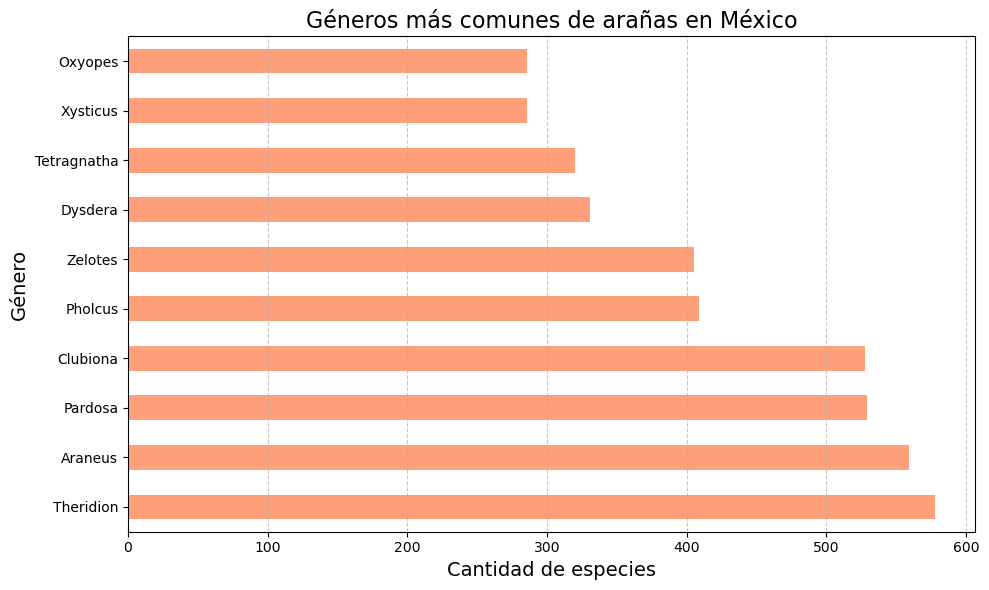

In [232]:
# graficar los géneros más comunes en en mundo
generos_mas_comunes_df.head(10).plot(kind='barh', color='#FFA07A', figsize=(10, 6))
plt.title('Géneros más comunes de arañas en México', fontsize=16)
plt.xlabel('Cantidad de especies', fontsize=14)
plt.ylabel('Género', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

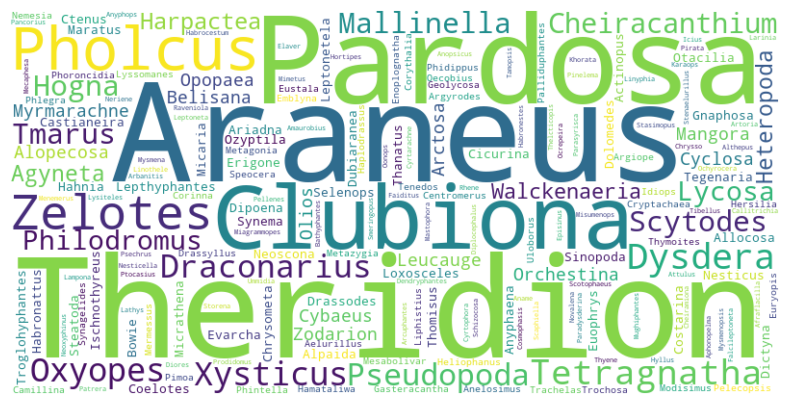

In [233]:
# word cloud
# generar el texto a partir de distribution 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(generos_mas_comunes_df)

# mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ocultar los ejes
plt.show()

## Filtrado de registros

### Arañas en México y otros paises

In [236]:
# filtrar  arañas encontradas en México y otros paises
df_spider_mexico_world = df[df['distribution'].str.contains('Mexico', na=False, case=False)]
# mostrar las primeras filas del dataFrame filtrado
df_spider_mexico_world.head(3)

,speciesId,species_lsid,family,genus,species,subspecies,author,year,parentheses,distribution
109,115,urn:lsid:nmbe.ch:spidersp:020904,Agelenidae,Agelenopsis,aperta,NaN,Gertsch,1934,1,"USA, Mexico"
193,204,urn:lsid:nmbe.ch:spidersp:020940,Agelenidae,Calilena,angelena,NaN,Chamberlin & Ivie,1941,0,"USA, Mexico"
194,205,urn:lsid:nmbe.ch:spidersp:020941,Agelenidae,Calilena,arizonica,NaN,Chamberlin & Ivie,1941,0,"USA, Mexico"


In [237]:
# dimensión del dataframe
print(f"Número de filas: {df_spider_mexico_world.shape[0]}")
print(f"Número de columnas: {df_spider_mexico_world.shape[1]}")

Número de filas: 2370
Número de columnas: 10


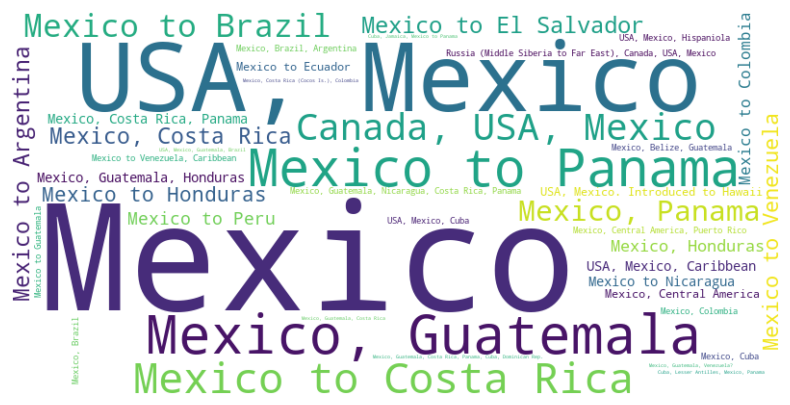

In [238]:
# Contar el número de paises
paises = df_spider_mexico_world['distribution'].value_counts()

# word cloud
# generar el texto a partir de distribution 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(paises)

# mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ocultar los ejes
plt.show()

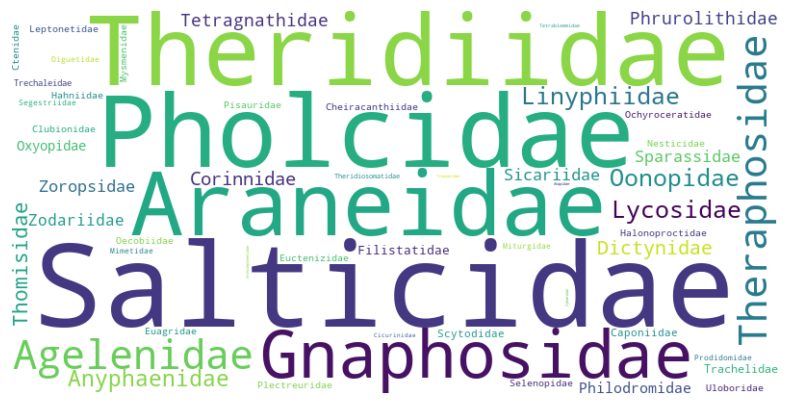

In [239]:
# Contar el número de paises
family = df_spider_mexico_world['family'].value_counts()

# word cloud
# generar el texto a partir de distribution 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(family)

# mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ocultar los ejes
plt.show()

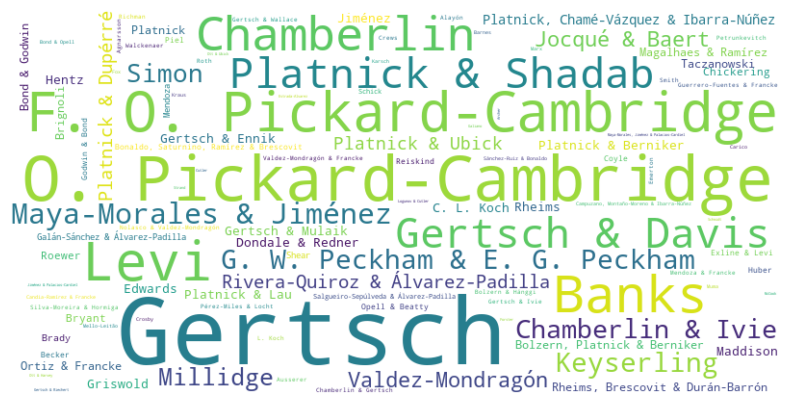

In [240]:
# Contar el número de author
author = df_spider_mexico_world['author'].value_counts()

# word cloud
# generar el texto a partir de author 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(author)

# mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ocultar los ejes
plt.show()

### Arañas de México

In [242]:
# Filtrar las arañas encontradas solo en México
df_spider_mexico = df[df['distribution']== "Mexico"]
# Mostrar las primeras filas del DataFrame filtrado
df_spider_mexico.head(3)

,speciesId,species_lsid,family,genus,species,subspecies,author,year,parentheses,distribution
200,211,urn:lsid:nmbe.ch:spidersp:020947,Agelenidae,Calilena,peninsulana,NaN,Banks,1898,1,Mexico
821,844,urn:lsid:nmbe.ch:spidersp:021060,Agelenidae,Melpomene,bicavata,NaN,F. O. Pickard-Cambridge,1902,1,Mexico
824,847,urn:lsid:nmbe.ch:spidersp:021063,Agelenidae,Melpomene,coahuilana,NaN,Gertsch & Davis,1940,1,Mexico


In [243]:
# dimensión del dataframe
print(f"Número de filas: {df_spider_mexico.shape[0]}")
print(f"Número de columnas: {df_spider_mexico.shape[1]}")

Número de filas: 1482
Número de columnas: 10


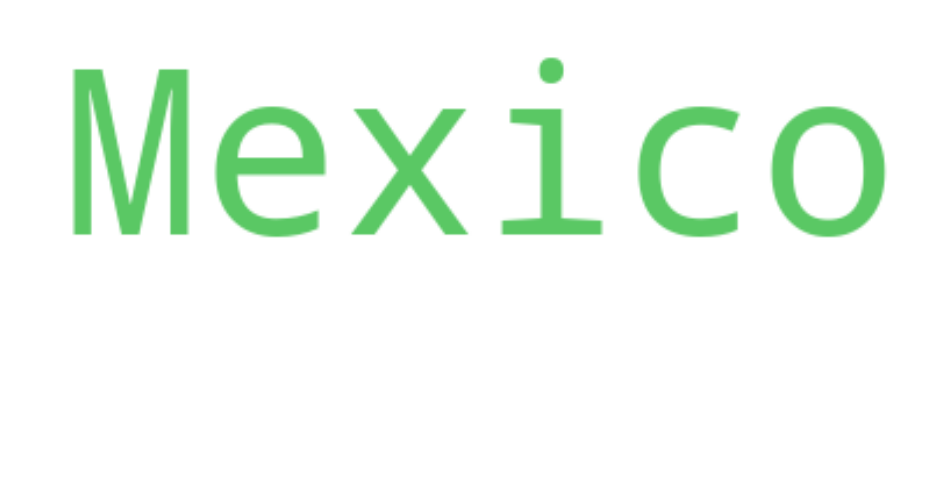

In [244]:
# word cloud
# generar el texto a partir de distribution 
text = " ".join(df_spider_mexico['distribution'].astype(str))

# crear la nube de palabras
wordcloud = WordCloud(
    max_words=200,
    max_font_size=100,
    colormap='viridis',
    background_color="white"
).generate(text)

# configurar y mostrar el gráfico
plt.figure(figsize=(12, 8))  # establecer el tamaño de la figura
plt.imshow(wordcloud, interpolation='bilinear')  # mostrar la nube de palabras
plt.axis("off")  # ocultar ejes
plt.show()  # mostrar la figura

In [245]:
#¿Cuántas especies únicas hay en México?
# Contar especies únicas
especies_unicas = df_spider_mexico['species'].nunique()
print(f"Cantidad de especies únicas en México: {especies_unicas}")

Cantidad de especies únicas en México: 1180


In [246]:
#¿Cuáles son las familias más diversas?
# Contar el número de especies por familia
familias_mas_diversas = df_spider_mexico['family'].value_counts()

# Mostrar las 10 familias más diversas
print("Familias más diversas en México:")
print(familias_mas_diversas.head(10))

Familias más diversas en México:
family
Pholcidae        166
Salticidae       105
Agelenidae        94
Theraphosidae     93
Oonopidae         84
Linyphiidae       69
Theridiidae       69
Gnaphosidae       66
Araneidae         66
Anyphaenidae      60
Name: count, dtype: int64


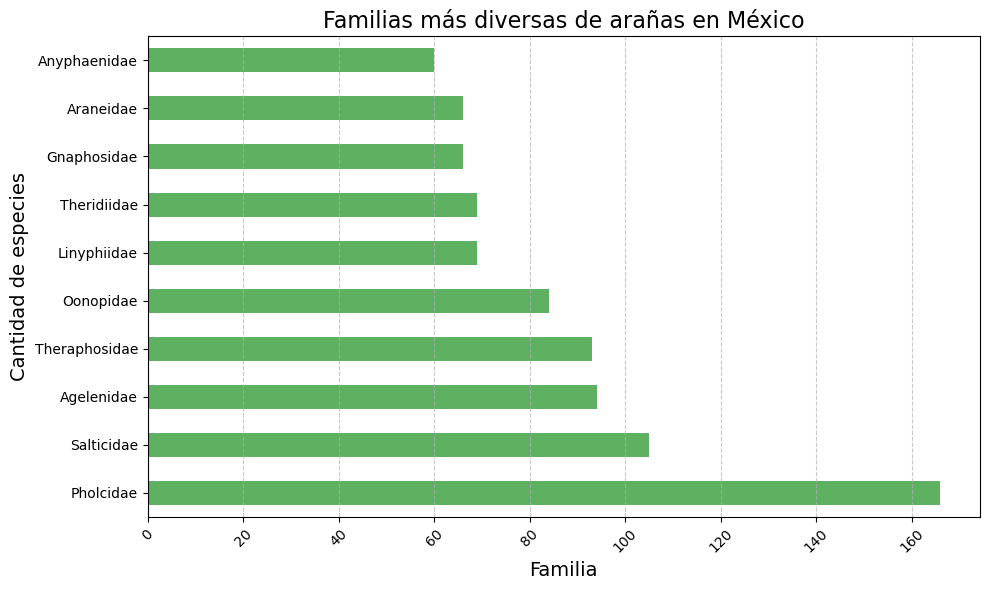

In [247]:
# graficar las familias más diversas
familias_mas_diversas.head(10).plot(kind='barh', color='#5EB160', figsize=(10, 6))
plt.title('Familias más diversas de arañas en México', fontsize=16)
plt.xlabel('Familia', fontsize=14)
plt.ylabel('Cantidad de especies', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

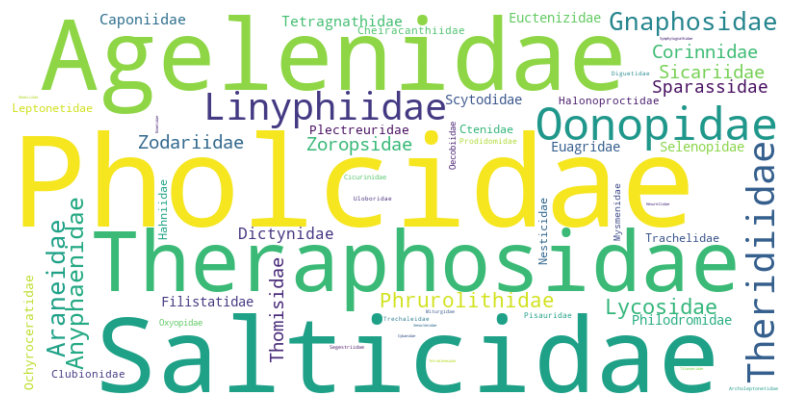

In [248]:
# word cloud
# generar el texto a partir de distribution 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(familias_mas_diversas)

# mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ocultar los ejes
plt.show()

In [249]:
#¿Cómo se distribuyen las arañas por género?
# Contar el número de especies por género
generos_mas_comunes = df_spider_mexico['genus'].value_counts()

# Mostrar los géneros más comunes
print("Géneros más comunes en México:")
print(generos_mas_comunes.head(10))

Géneros más comunes en México:
genus
Novalena       43
Anyphaena      43
Anopsicus      35
Metagonia      33
Loxosceles     32
Ishania        31
Phonotimpus    31
Physocyclus    30
Mermessus      29
Araneus        27
Name: count, dtype: int64


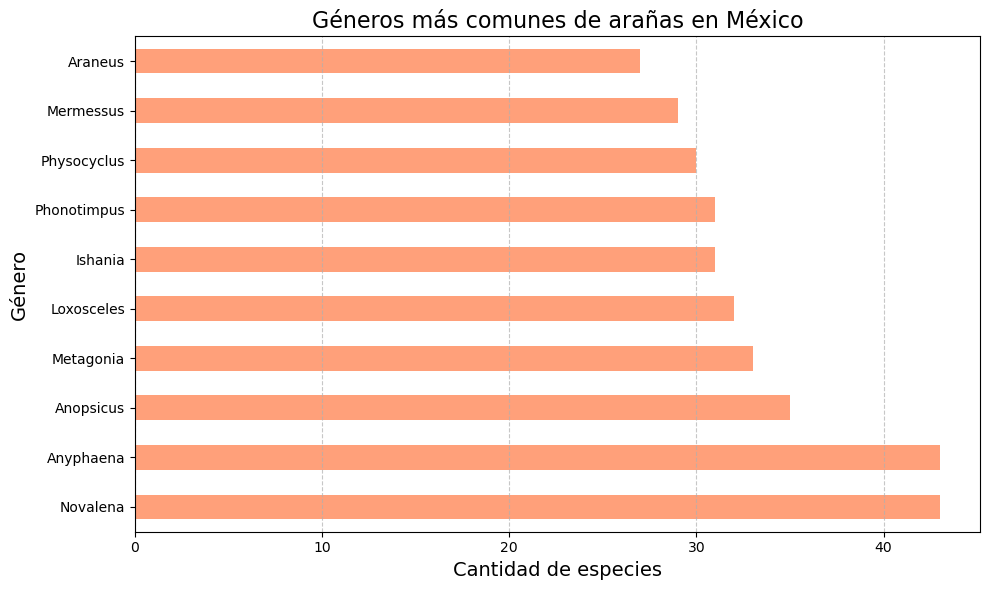

In [250]:
# graficar los géneros más comunes en México
generos_mas_comunes.head(10).plot(kind='barh', color='#FFA07A', figsize=(10, 6))
plt.title('Géneros más comunes de arañas en México', fontsize=16)
plt.xlabel('Cantidad de especies', fontsize=14)
plt.ylabel('Género', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

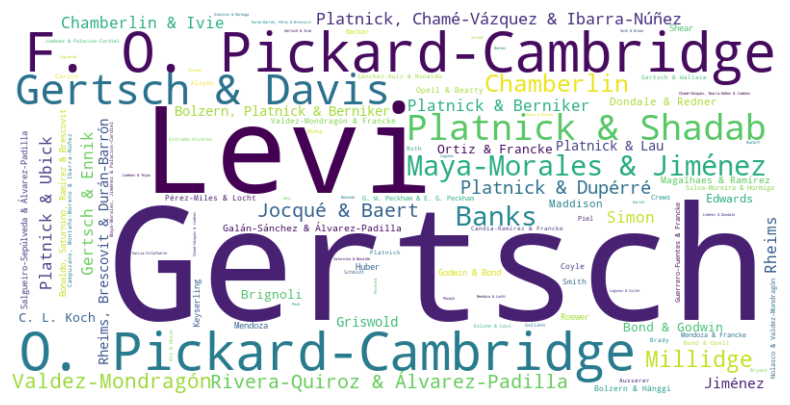

In [251]:
# Contar el número de author
author = df_spider_mexico['author'].value_counts()

# word cloud
# generar el texto a partir de author 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(author)

# mostrar la imagen de la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ocultar los ejes
plt.show()